# Problem Statement

This project aims to analyze the academic performance of students based on various factors such as gender, parent's education and marital status, ethnic group, and extracurricular activities like sports. The goal is to uncover patterns and correlations that can provide insights into the key factors influencing student performance.


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Students_Scores.csv")

In [4]:
print (df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [5]:
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [8]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [12]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop Unnamed column

In [14]:
df = df.drop("Unnamed: 0", axis = 1) #delete it from verticle axis

In [15]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


# Change weekly study hours 
(this is for example if you have error in column)

In [17]:
df ["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5 - 10")

In [18]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Data Analysis

# 1. Gender_Distribution

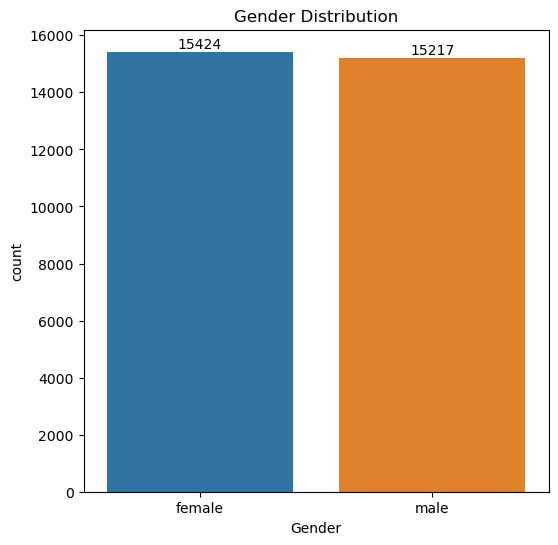

In [45]:
plt.figure(figsize=(6,6))
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

A bar plot was used to display the distribution of students based on gender. The plot shows the number of male and female students. The annotations on the bars highlight the exact count of students in each category.

In [31]:
gb = df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean', "WritingScore":'mean'})
print(gb)                                        

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


In [32]:
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


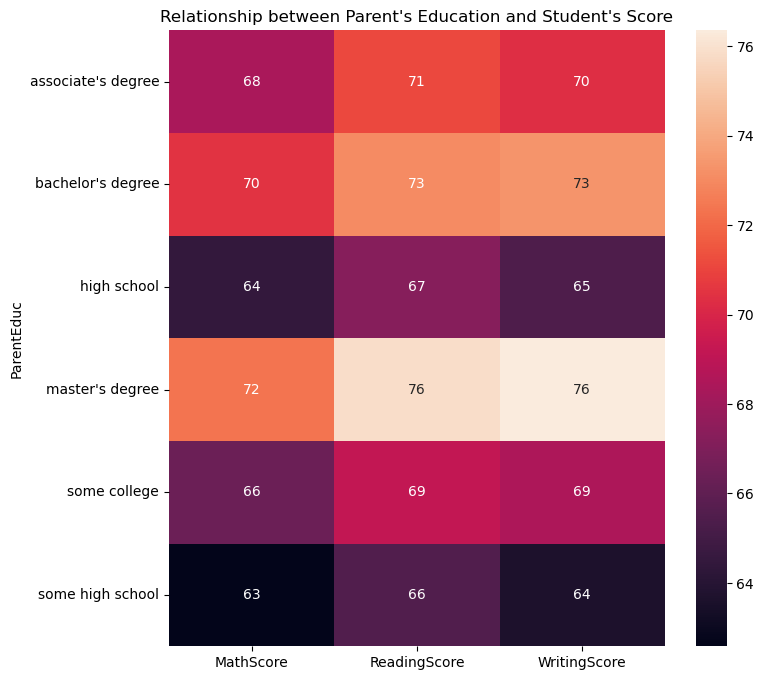

In [46]:
plt.figure(figsize=(8,8))
sns.heatmap(gb, annot = True)
plt.title("Relationship between Parent's Education and Student's Score")
plt.show()

A heatmap visualizes the relationship between parents' education levels and student scores. The color gradient indicates the strength of the correlation, with lighter colors representing higher scores. This analysis reveals that higher levels of parental education tend to correspond with better student performance.

In [39]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean', "WritingScore":'mean'})
print(gb1) 

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


In [40]:
gb1

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


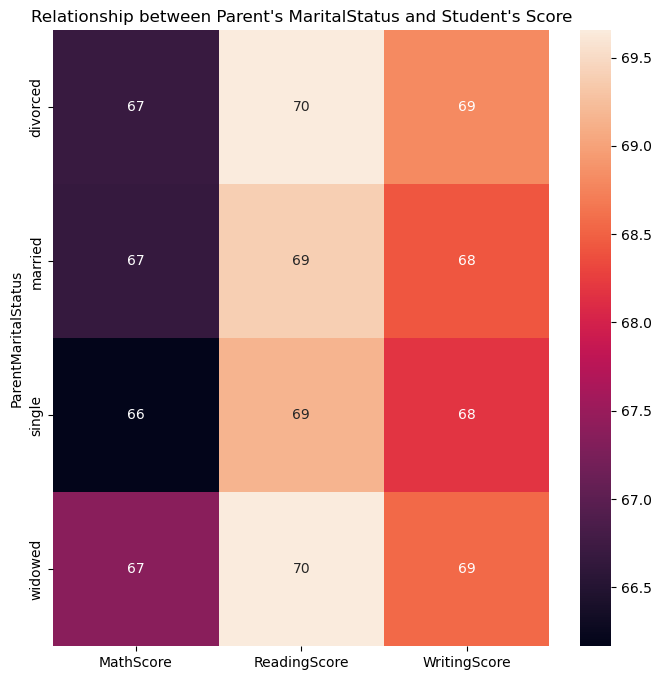

In [48]:
plt.figure(figsize=(8,8))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Parent's MaritalStatus and Student's Score")
plt.show()

Another heatmap examines how parents' marital status relates to student performance. The plot suggests that students from households with married parents tend to perform better, though the correlation is not as strong as that with education levels.

In [96]:
gb2 = df.groupby("PracticeSport").agg({"MathScore":'mean',"ReadingScore":'mean', "WritingScore":'mean'})
print(gb2) 

               MathScore  ReadingScore  WritingScore
PracticeSport                                       
never          64.171079     68.337662     66.522727
regularly      67.839155     69.943019     69.604003
sometimes      66.274831     69.241307     68.072438


In [97]:
gb2

,MathScore,ReadingScore,WritingScore
PracticeSport,,,
never,64.171079,68.337662,66.522727
regularly,67.839155,69.943019,69.604003
sometimes,66.274831,69.241307,68.072438


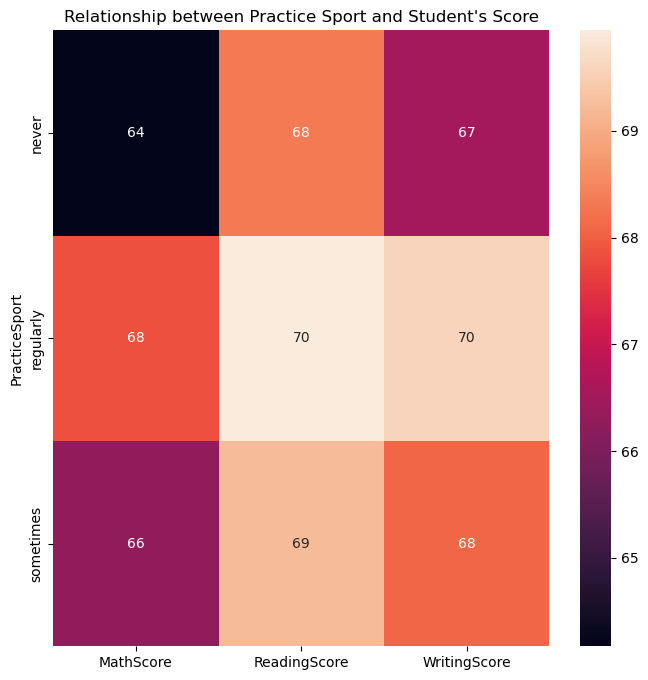

In [98]:
plt.figure(figsize=(8,8))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Practice Sport and Student's Score")
plt.show()

This heatmap explores the relationship between the practice of sports and academic performance. It indicates a slight positive correlation, suggesting that students who engage in sports might achieve better scores.

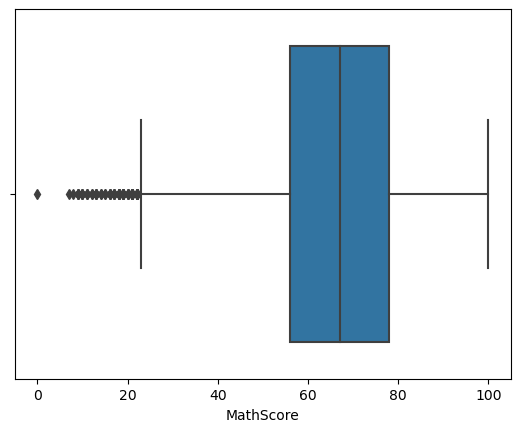

In [52]:
sns.boxplot(data = df, x = "MathScore")
plt.show()

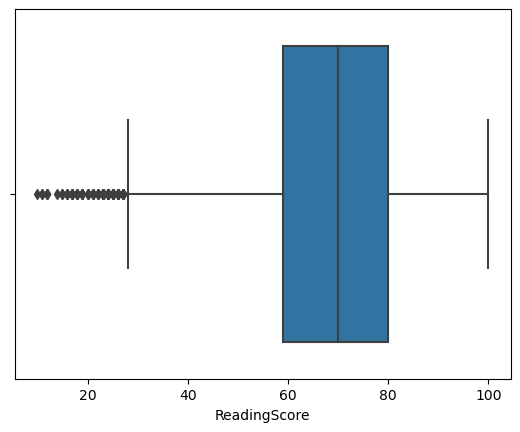

In [53]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

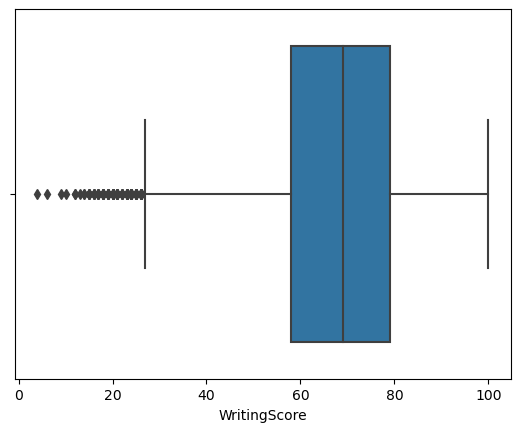

In [54]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

**Explanation** 

Boxplots were generated to show the distribution of scores for Math, Reading, and Writing. These plots reveal the central tendency, spread, and outliers in the score distributions for each subject. The analysis highlights that the score ranges are fairly similar across subjects, though Math tends to have a wider distribution.

In [55]:
df_melted = pd.melt(df, value_vars=["MathScore", "ReadingScore", "WritingScore"], 
                    var_name="Subject", value_name="Score")

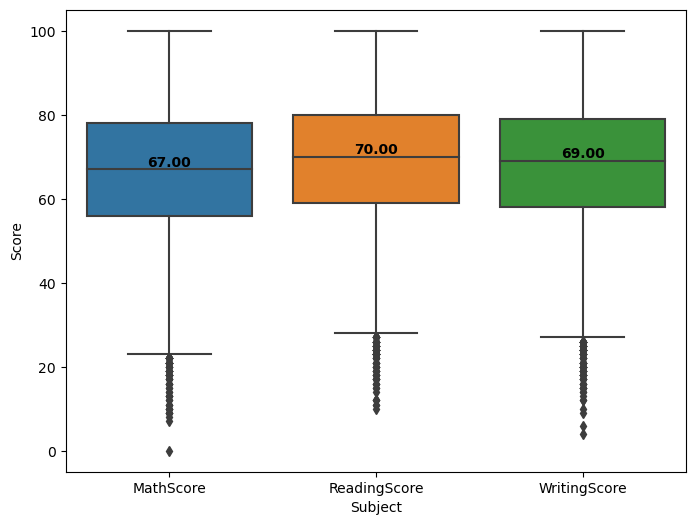

In [58]:
# Create the boxplot
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(data=df_melted, x="Subject", y="Score")

# Add annotations
for i in range(len(df_melted['Subject'].unique())):
    y_values = df_melted[df_melted['Subject'] == df_melted['Subject'].unique()[i]]['Score']
    x_value = i
    median_val = y_values.median()
    
    # Annotating the median value on the boxplot
    plt.text(x=x_value, y=median_val, s=f"{median_val:.2f}", ha='center', va='bottom', 
             color='black', fontsize=10, fontweight='bold')

# Display the plot
plt.show()

A combined boxplot visualizes the distributions of scores for all subjects (Math, Reading, Writing) in a single plot. The boxplot also includes annotations showing the median scores for each subject. This comparison helps identify which subjects students tend to perform better in on average and in this case **Reading Score Subject** is perform better.

In [59]:
print(df["EthnicGroup"].unique()) # ingnore the nan value

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


# Distribution of Ethnic Group

In [66]:
group_A = df.loc[(df['EthnicGroup'] == "group A")].count()
print(group_A)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


In [67]:
group_B = df.loc[(df['EthnicGroup'] == "group B")].count()
print(group_B)

Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64


In [68]:
group_C = df.loc[(df['EthnicGroup'] == "group C")].count()
print(group_C)

Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType              9212
TestPrep               8652
ParentMaritalStatus    8858
PracticeSport          9050
IsFirstChild           8929
NrSiblings             8763
TransportMeans         8280
WklyStudyHours         8933
MathScore              9212
ReadingScore           9212
WritingScore           9212
dtype: int64


In [69]:
group_D = df.loc[(df['EthnicGroup'] == "group D")].count()
print(group_D)

Gender                 7503
EthnicGroup            7503
ParentEduc             7056
LunchType              7503
TestPrep               7070
ParentMaritalStatus    7218
PracticeSport          7343
IsFirstChild           7285
NrSiblings             7106
TransportMeans         6713
WklyStudyHours         7270
MathScore              7503
ReadingScore           7503
WritingScore           7503
dtype: int64


In [70]:
group_E = df.loc[(df['EthnicGroup'] == "group E")].count()
print(group_E)

Gender                 4041
EthnicGroup            4041
ParentEduc             3814
LunchType              4041
TestPrep               3804
ParentMaritalStatus    3892
PracticeSport          3954
IsFirstChild           3918
NrSiblings             3820
TransportMeans         3624
WklyStudyHours         3924
MathScore              4041
ReadingScore           4041
WritingScore           4041
dtype: int64


In [87]:
l = ["group_A", "group_B", "group_C", "group_D", "group_E"]
m_list = [group_A["EthnicGroup"],group_B["EthnicGroup"],group_C["EthnicGroup"],group_D["EthnicGroup"],group_E["EthnicGroup"]]

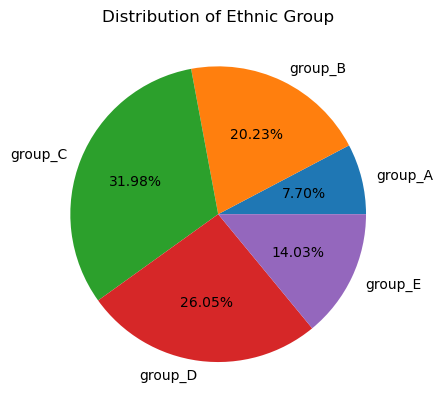

In [99]:
plt.pie(m_list, labels =l, autopct = "%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

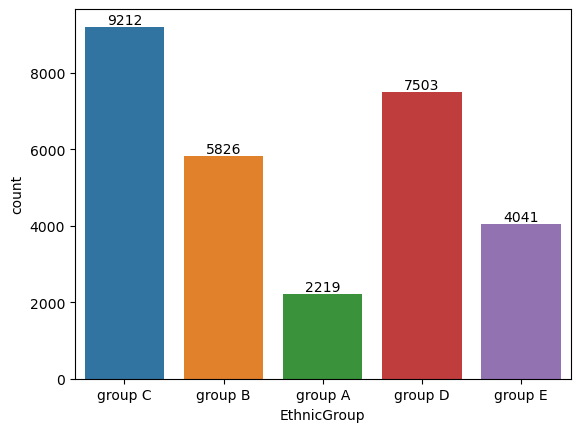

In [100]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])

This pie chart and count plot were used to display the distribution of students across different ethnic groups. The analysis highlights that certain ethnic groups are more represented in the dataset than others, which may contribute to differences in overall academic performance. in this case **group C** is more represented in the dataset than others.

# Conclusion

The analysis reveals several interesting patterns in student performance. Gender distribution is relatively balanced, though parental education and marital status show stronger correlations with student scores. Additionally, students who engage in extracurricular activities like sports tend to perform slightly better. The boxplots demonstrate that the distribution of scores is relatively consistent across subjects, with some variability in Math scores. Overall, the findings suggest that parental involvement and balanced extracurricular activities play a crucial role in student success.